# Decision Tree Classification

In [1]:
from warnings import filterwarnings
filterwarnings('ignore')

### Read Iris Dataset

In [2]:
import pandas as pd
df = pd.read_csv('iris.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


### Missing values in dataframe

In [4]:
df.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [5]:
df['species'].value_counts()

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

### Seperate X and Y 
Species ~ Remaining Features

In [6]:
X = df.drop(columns=['species'])
Y = df[['species']]

In [7]:
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [8]:
Y.head()

,species
0,setosa
1,setosa
2,setosa
3,setosa
4,setosa


### In any decision tree model scaling is not necessary

### Apply label encoder on Y

In [9]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
Y['species'] = le.fit_transform(Y['species'])

In [10]:
Y

,species
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


In [11]:
Y.value_counts()

species
0          50
1          50
2          50
Name: count, dtype: int64

### Apply preprocessing pipeline on X

In [12]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [13]:
num_pipe = Pipeline(steps=[('imputer',SimpleImputer(strategy='mean')),
                           ('scaler',StandardScaler())])

In [15]:
X_pre = num_pipe.fit_transform(X)
X_pre[0:5]

array([[-0.90068117,  1.01900435, -1.34022653, -1.3154443 ],
       [-1.14301691, -0.13197948, -1.34022653, -1.3154443 ],
       [-1.38535265,  0.32841405, -1.39706395, -1.3154443 ],
       [-1.50652052,  0.09821729, -1.2833891 , -1.3154443 ],
       [-1.02184904,  1.24920112, -1.34022653, -1.3154443 ]])

In [16]:
cols = num_pipe.get_feature_names_out()
cols

array(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'],
      dtype=object)

In [17]:
X_pre = pd.DataFrame(X_pre, columns=cols)
X_pre.head()

,sepal_length,sepal_width,petal_length,petal_width
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444


### Train Test split

In [18]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X_pre, Y, test_size=0.33, random_state=63)

In [19]:
xtrain.shape

(100, 4)

In [20]:
xtest.shape

(50, 4)

### Create a decision tree model

In [24]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(max_depth=1, min_samples_split=11, min_samples_leaf=15, criterion='entropy')
model.fit(xtrain, ytrain)

DecisionTreeClassifier(criterion='entropy', max_depth=1, min_samples_leaf=15,
                       min_samples_split=11)

In [25]:
# Model accuracy in training
model.score(xtrain, ytrain)

0.69

In [26]:
# Model accuracy in testing
model.score(xtest, ytest)

0.62

### Hyperparameter tuning of model

In [27]:
params = {'max_depth':[1,2,3,4,5,6],
          'min_samples_split':[3,4,5,6,7,8,9,10,11],
          'min_samples_leaf':[5,6,7,8,9,10,11],
          'criterion':['gini', 'entropy']}

In [28]:
from sklearn.model_selection import GridSearchCV
dtc = DecisionTreeClassifier()
gscv = GridSearchCV(dtc, param_grid=params, cv=5, scoring='f1_macro')
gscv.fit(xtrain, ytrain)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 6],
                         'min_samples_leaf': [5, 6, 7, 8, 9, 10, 11],
                         'min_samples_split': [3, 4, 5, 6, 7, 8, 9, 10, 11]},
             scoring='f1_macro')

In [29]:
gscv.best_params_

{'criterion': 'gini',
 'max_depth': 2,
 'min_samples_leaf': 5,
 'min_samples_split': 3}

In [30]:
gscv.best_score_

0.9366300366300365

In [31]:
best_dtc = gscv.best_estimator_
best_dtc

DecisionTreeClassifier(max_depth=2, min_samples_leaf=5, min_samples_split=3)

### Evaluate model in training and testing

In [32]:
best_dtc.score(xtrain, ytrain)

0.97

In [33]:
best_dtc.score(xtest, ytest)

0.94

# Plotting the decision tree

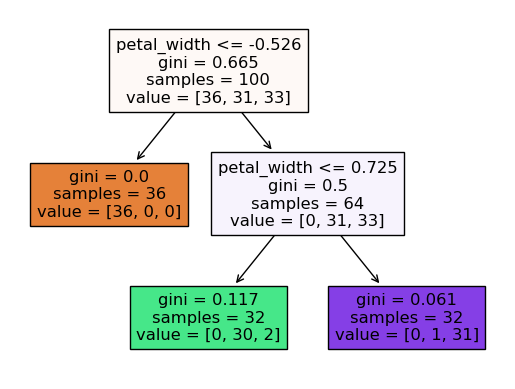

In [38]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
plot_tree(best_dtc, filled=True, feature_names=list(xtrain.columns))
plt.show()

In [39]:
ytrain.value_counts()

species
0          36
2          33
1          31
Name: count, dtype: int64

### Predict train and test data

In [40]:
ypred_tr = best_dtc.predict(xtrain)
ypred_ts = best_dtc.predict(xtest)

In [41]:
ypred_tr

array([1, 0, 0, 0, 2, 0, 0, 0, 0, 2, 2, 0, 0, 1, 1, 1, 2, 2, 0, 2, 0, 0,
       1, 1, 1, 2, 1, 0, 1, 2, 1, 0, 1, 0, 2, 2, 1, 0, 0, 2, 1, 0, 2, 0,
       0, 1, 2, 2, 2, 1, 1, 2, 0, 2, 2, 0, 1, 2, 1, 2, 1, 1, 1, 2, 1, 1,
       1, 0, 0, 0, 2, 1, 0, 0, 1, 1, 2, 2, 0, 2, 0, 2, 2, 1, 0, 0, 0, 2,
       2, 1, 2, 1, 1, 0, 0, 0, 1, 2, 2, 0])

In [43]:
ytrain.head()

,species
119,2
23,0
38,0
37,0
145,2


In [42]:
ypred_ts

array([2, 0, 1, 1, 2, 0, 2, 1, 2, 1, 0, 1, 2, 1, 1, 2, 2, 1, 2, 1, 1, 1,
       0, 1, 0, 0, 1, 2, 2, 1, 0, 2, 1, 1, 1, 2, 0, 2, 0, 1, 0, 1, 1, 1,
       2, 0, 0, 0, 0, 1])

In [44]:
ytest.head()

,species
111,2
40,0
69,1
68,1
117,2


### Plot the confusion matrix for test data

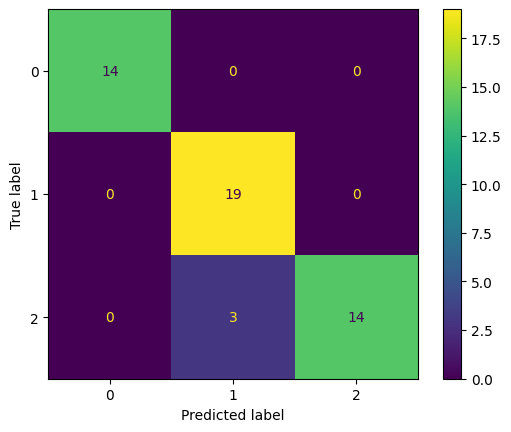

In [45]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cf = confusion_matrix(ytest, ypred_ts)
cfd = ConfusionMatrixDisplay(cf, display_labels=best_dtc.classes_)
cfd.plot()

### Print Classification report

In [46]:
from sklearn.metrics import classification_report
print(classification_report(ytest, ypred_ts))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.86      1.00      0.93        19
           2       1.00      0.82      0.90        17

    accuracy                           0.94        50
   macro avg       0.95      0.94      0.94        50
weighted avg       0.95      0.94      0.94        50



### Getting orignal labels for values : le.inverse_transform

In [47]:
ypred_tr_lb = le.inverse_transform(ypred_tr)
ypred_ts_lb = le.inverse_transform(ypred_ts)

In [49]:
ypred_tr_lb

array(['versicolor', 'setosa', 'setosa', 'setosa', 'virginica', 'setosa',
       'setosa', 'setosa', 'setosa', 'virginica', 'virginica', 'setosa',
       'setosa', 'versicolor', 'versicolor', 'versicolor', 'virginica',
       'virginica', 'setosa', 'virginica', 'setosa', 'setosa',
       'versicolor', 'versicolor', 'versicolor', 'virginica',
       'versicolor', 'setosa', 'versicolor', 'virginica', 'versicolor',
       'setosa', 'versicolor', 'setosa', 'virginica', 'virginica',
       'versicolor', 'setosa', 'setosa', 'virginica', 'versicolor',
       'setosa', 'virginica', 'setosa', 'setosa', 'versicolor',
       'virginica', 'virginica', 'virginica', 'versicolor', 'versicolor',
       'virginica', 'setosa', 'virginica', 'virginica', 'setosa',
       'versicolor', 'virginica', 'versicolor', 'virginica', 'versicolor',
       'versicolor', 'versicolor', 'virginica', 'versicolor',
       'versicolor', 'versicolor', 'setosa', 'setosa', 'setosa',
       'virginica', 'versicolor', 'setosa',

In [51]:
ypred_ts_lb

array(['virginica', 'setosa', 'versicolor', 'versicolor', 'virginica',
       'setosa', 'virginica', 'versicolor', 'virginica', 'versicolor',
       'setosa', 'versicolor', 'virginica', 'versicolor', 'versicolor',
       'virginica', 'virginica', 'versicolor', 'virginica', 'versicolor',
       'versicolor', 'versicolor', 'setosa', 'versicolor', 'setosa',
       'setosa', 'versicolor', 'virginica', 'virginica', 'versicolor',
       'setosa', 'virginica', 'versicolor', 'versicolor', 'versicolor',
       'virginica', 'setosa', 'virginica', 'setosa', 'versicolor',
       'setosa', 'versicolor', 'versicolor', 'versicolor', 'virginica',
       'setosa', 'setosa', 'setosa', 'setosa', 'versicolor'], dtype=object)

### Predicting the new samples

In [52]:
xnew = pd.read_csv('iris_sample.csv')
xnew

,sepal_length,sepal_width,petal_length,petal_width
0,5.5,2.5,4.0,1.3
1,6.9,3.1,5.1,2.3
2,5.1,2.5,3.0,1.1
3,4.4,2.9,NaN,0.2
4,5.9,3.0,5.1,1.8
5,5.5,3.5,1.3,0.2
6,5.6,NaN,3.6,1.3
7,6.5,3.0,5.2,2.0
8,5.3,3.7,1.5,0.2
9,5.1,3.4,1.5,NaN


In [53]:
xnew.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  15 non-null     float64
 1   sepal_width   14 non-null     float64
 2   petal_length  14 non-null     float64
 3   petal_width   14 non-null     float64
dtypes: float64(4)
memory usage: 612.0 bytes


In [54]:
xnew_pre = num_pipe.transform(xnew)
xnew_pre

array([[-0.41600969, -1.28296331,  0.13754657,  0.13250973],
       [ 1.2803405 ,  0.09821729,  0.76275827,  1.44883158],
       [-0.90068117, -1.28296331, -0.4308277 , -0.13075464],
       [-1.74885626, -0.36217625,  0.        , -1.3154443 ],
       [ 0.06866179, -0.13197948,  0.76275827,  0.79067065],
       [-0.41600969,  1.01900435, -1.39706395, -1.3154443 ],
       [-0.29484182,  0.        , -0.08980313,  0.13250973],
       [ 0.79566902, -0.13197948,  0.8195957 ,  1.05393502],
       [-0.65834543,  1.47939788, -1.2833891 , -1.3154443 ],
       [-0.90068117,  0.78880759, -1.2833891 ,  0.        ],
       [ 0.31099753, -0.59237301,  0.13754657,  0.13250973],
       [-0.41600969, -1.51316008, -0.03296571, -0.26238682],
       [ 2.24968346, -0.13197948,  1.33113254,  1.44883158],
       [ 1.2803405 ,  0.09821729,  0.64908342,  0.3957741 ],
       [ 0.18982966, -1.97355361,  0.70592084,  0.3957741 ]])

In [55]:
xnew_pre = pd.DataFrame(xnew_pre, columns=cols)
xnew_pre

,sepal_length,sepal_width,petal_length,petal_width
0,-0.416010,-1.282963,0.137547,0.132510
1,1.280340,0.098217,0.762758,1.448832
2,-0.900681,-1.282963,-0.430828,-0.130755
3,-1.748856,-0.362176,0.000000,-1.315444
4,0.068662,-0.131979,0.762758,0.790671
5,-0.416010,1.019004,-1.397064,-1.315444
6,-0.294842,0.000000,-0.089803,0.132510
7,0.795669,-0.131979,0.819596,1.053935
8,-0.658345,1.479398,-1.283389,-1.315444
9,-0.900681,0.788808,-1.283389,0.000000


In [56]:
preds = model.predict(xnew_pre)
preds

array([2, 2, 2, 0, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2, 2])

In [57]:
preds_lb = le.inverse_transform(preds)

In [58]:
preds_lb

array(['virginica', 'virginica', 'virginica', 'setosa', 'virginica',
       'setosa', 'virginica', 'virginica', 'setosa', 'virginica',
       'virginica', 'virginica', 'virginica', 'virginica', 'virginica'],
      dtype=object)

### Save predictions in dataframe

In [59]:
xnew['species_pred']=preds_lb

In [60]:
xnew

,sepal_length,sepal_width,petal_length,petal_width,species_pred
0,5.5,2.5,4.0,1.3,virginica
1,6.9,3.1,5.1,2.3,virginica
2,5.1,2.5,3.0,1.1,virginica
3,4.4,2.9,NaN,0.2,setosa
4,5.9,3.0,5.1,1.8,virginica
5,5.5,3.5,1.3,0.2,setosa
6,5.6,NaN,3.6,1.3,virginica
7,6.5,3.0,5.2,2.0,virginica
8,5.3,3.7,1.5,0.2,setosa
9,5.1,3.4,1.5,NaN,virginica


In [61]:
xnew.to_csv('iris_results.csv', index=False)